#Patel Mahi Govindbhai - D24AIML089


### Goal : To build a classification model that accurately identifies fraudulent credit card transactions from a dataset, minimizing false negatives and false positives

#Objective


The primary objective of this project is to develop a classification model that can accurately identify fraudulent credit card transactions. The key focus is on minimizing false negatives and false positives, ensuring both security and user satisfaction.



- False Negatives : These are fraudulent transactions wrongly predicted as legitimate. This is dangerous because fraud goes undetected.

- False Positives : These are legitimate transactions wrongly flagged as fraud, leading to inconvenience for customers and unnecessary manual review.

# Key Concepts:
- Machine Learning Classification Algorithms: Models such as RandomForest, Logistic Regression, SVM, etc., are trained on historical transaction data to learn patterns of fraud.

- Data Imbalance Handling: Fraud cases are rare compared to normal ones, so techniques like SMOTE, undersampling, or class weighting are often applied.

# Importance:
- Accurate fraud detection ensures:

- Reduced financial losses for banks and users.

- Enhanced customer trust and experience.

- Efficient resource allocation for manual verification.

In [ ]:
#import required library
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


# Data loading and Pre-processing


## Importance of Pre-processing:
- Proper data pre-processing ensures:

- Clean, usable input for models

- Balanced learning and unbiased results

- Better generalization and performance

###Here steps for data pre-processing
1. Data Loading:
2. Understanding the Dataset:
3. Handling Imbalanced Data:
4. Feature Scaling:
5. Data Splitting:


In [ ]:
#Load Dataset using inbuilt pandas library
df = pd.read_csv('/content/creditcard.csv')


In [ ]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
#Use to get some information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
#To get detailed information about the dataset
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


- This Dataset contains 284,807 transactions, with imbalanced classes.

- Transaction amounts range from ₹0 to ₹25,691, average is ₹88.

- Features are centered around zero, with standard deviations.

In [ ]:
#check null value
df.isnull().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


#check duplicate records

In [ ]:
#check duplicate records
print(df.duplicated())


0         False
1         False
2         False
3         False
4         False
          ...  
284802    False
284803    False
284804    False
284805    False
284806    False
Length: 284807, dtype: bool


In [ ]:
#sum of duplicate records
print(df.duplicated().sum())

1081


#Remove duplicate records from original data

In [ ]:
#drop duplicate data
df.drop_duplicates(inplace=True)
print(df.duplicated().sum())

0


#check the classes with column distribution

In [ ]:
df['Class'].value_counts()

,count
Class,
0,283253
1,473


## Visualization of Class Distribution
In fraud detection tasks, understanding the class distribution is crucial before building any\ model. The given code uses a pie chart to visualize the proportion of fraudulent and non-fraudulent transactions in the dataset.



- df['Class'].value_counts(): Counts the number of occurrences of each class (0 = Not fraud, 1 = Fraud).

- plt.pie(...): Creates a pie chart representing the percentage of each class.

- autopct="%.2f": Displays the percentage values on the chart with two decimal places.

### Purpose pie chart:

- Identifying Class Imbalance: In fraud detection datasets, fraud cases typically form a very small portion of the total transactions.

- Decision Making for Preprocessing: imbalance indicates the need for techniques like oversampling, undersampling, or using balanced class weights during model training.



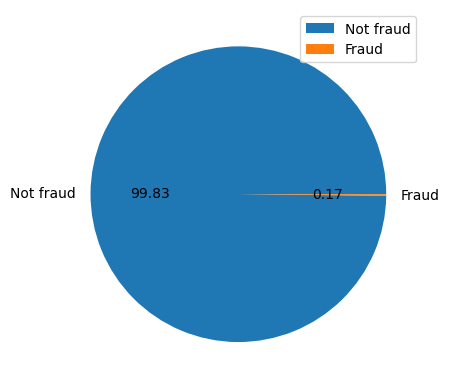

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.pie(df['Class'].value_counts(),autopct="%.2f",labels=['Not fraud','Fraud'])
plt.legend()

It can represent only 0.17% fraud data avaliable in dataset and 99.83% not fraud.

## Purpose of the Plot:
- Visual Trend Analysis: observe fluctuations in transaction amounts over time or transaction order.

- Outlier Detection: Large spikes may represent high-value transactions, which could be potential fraud cases.

- Pattern Identification: Repeated transaction patterns, periodic spikes, or anomalies may help in feature engineering.

,Time
0,0.0
1,0.0
2,1.0
3,1.0
4,2.0
...,...
284802,172786.0
284803,172787.0
284804,172788.0
284805,172788.0


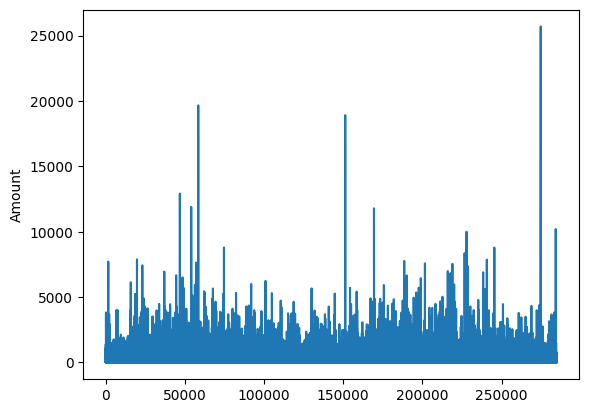

In [ ]:
#amount distribution with plot
sns.lineplot(df['Amount'])
df['Time']

In [ ]:
# drop time because it will not help in building the model
df.drop(['Time'],inplace=True,axis=1)
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


#Data Spliting

In [ ]:
#split data into dependent and independent variables

a=df.iloc[:,:-1]
b=df.iloc[:,-1]
a.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99


In [ ]:
b.head()

,Class
0,0
1,0
2,0
3,0
4,0


In [ ]:
#Data split with test data and train data
from sklearn.model_selection import train_test_split

a_test,a_train,b_test,b_train=train_test_split(a,b,test_size=0.3,random_state=42)

a_train.shape,a_test.shape

((85118, 29), (198608, 29))

#Scaling on data

In [ ]:
from sklearn.preprocessing import StandardScaler

#scaling the data
scaler=StandardScaler()
a_train=scaler.fit_transform(a_train)
a_test=scaler.transform(a_test)

#checking the shape of a_train and a_test
a_train.shape,a_test.shape

((85118, 29), (198608, 29))

#Using Linear regression

# Objective:
The goal is to train a Logistic Regression model to classify transactions as either fraudulent (1) or legitimate (0) based on input features.


### breakdown of code:
- from sklearn.linear_model import LogisticRegression: Imports the Logistic Regression class from Scikit-learn.

- model = LogisticRegression(): Initializes the Logistic Regression model with default hyperparameters.

- model.fit: Trains the model using the training data:

- a_train: Feature matrix.

- b_train: Target vector.




### Why Logistic Regression?
-  Logistic Regression is a fundamental and widely used binary classification algorithm.

- It estimates the probability that a given input belongs to a certain class.

- It works well for linearly separable data and provides interpretable coefficients that show how each feature affects the prediction.

- Logistic Regression is often used as a baseline model to compare with more complex models.

In [ ]:
from sklearn.linear_model import LogisticRegression

# Model Training
model=LogisticRegression()
model.fit(a_train,b_train)

LogisticRegression()

In [ ]:
b_pred=model.predict(a_test)
b_pred


array([0, 0, 0, ..., 0, 0, 0])

#Model Evaluation

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix ,accuracy_score
print(classification_report(b_test, b_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    198269
           1       0.86      0.64      0.73       339

    accuracy                           1.00    198608
   macro avg       0.93      0.82      0.87    198608
weighted avg       1.00      1.00      1.00    198608



In [ ]:
print(confusion_matrix(b_test, b_pred))
print("Accuracy:", accuracy_score(b_test, b_pred))

[[198234     35]
 [   122    217]]
Accuracy: 0.9992094981068235


#Visulization of confusion matrix

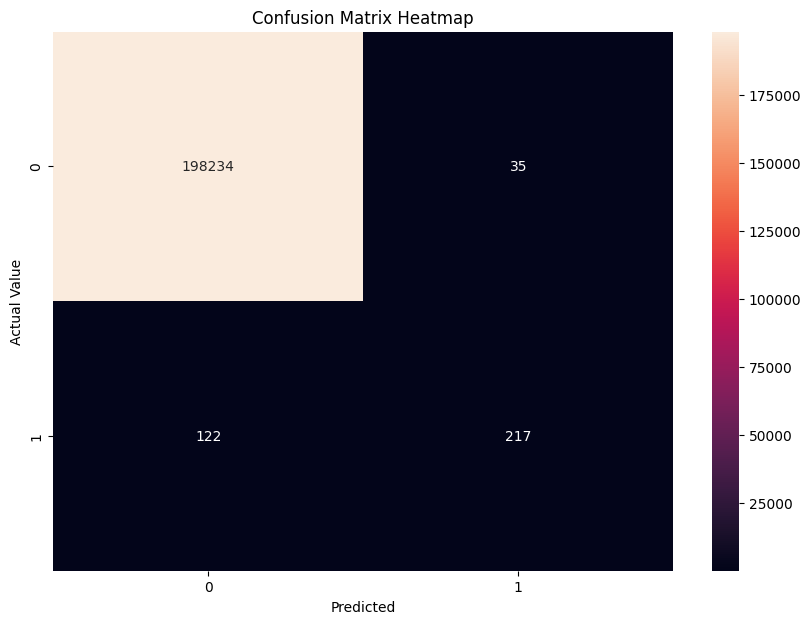

In [ ]:
# confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay
plt.figure(figsize=(10,7))
sns.heatmap(confusion_matrix(b_test, b_pred), annot=True, fmt='d')
plt.title("Confusion Matrix Heatmap")
plt.xlabel("Predicted")
plt.ylabel("Actual Value")
plt.show()

#Desicion Tree

#Objective:
To train a Decision Tree classification model that can accurately distinguish between fraudulent and legitimate credit card transactions using labeled training data.

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Model Training
model=DecisionTreeClassifier()
model.fit(a_train,b_train)

DecisionTreeClassifier()

## Breakdown of code:
- from sklearn.tree import DecisionTreeClassifier: Imports the Decision Tree classifier from Scikit-learn.

- model = DecisionTreeClassifier(): Initializes the model with default parameters.

- model.fit(a_train, b_train): Trains the model using the training features (a_train) and target labels (b_train).

In [ ]:
#model evaluation
b_pred_tree=model.predict(a_test)
print(classification_report(b_test, b_pred_tree))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    198269
           1       0.75      0.77      0.76       339

    accuracy                           1.00    198608
   macro avg       0.87      0.88      0.88    198608
weighted avg       1.00      1.00      1.00    198608



In [ ]:
#check model accuracy
accuracy_score(b_test, b_pred_tree)



0.9991591476677677

In [ ]:
confusion_matrix(b_test, b_pred_tree)

array([[198181,     88],
       [    79,    260]])

#Visulization of confusion matrix by desicion tree

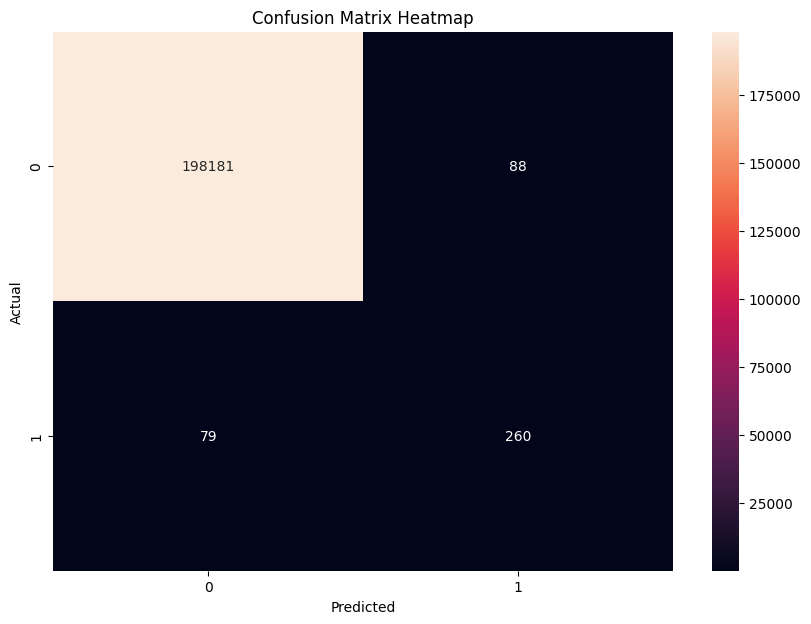

In [ ]:
# heat map
plt.figure(figsize=(10,7))
sns.heatmap(confusion_matrix(b_test, b_pred_tree), annot=True, fmt='d')
plt.title("Confusion Matrix Heatmap")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [ ]:
# rows with any missing values
df = df.dropna()
print("original DataFrame:", df.shape)
print("missing values:", df.shape)

original DataFrame: (284807, 30)
missing values: (284807, 30)


#Random forest classifire

#Objective:
To build a robust and accurate classification model that can effectively detect fraudulent transactions with high precision and recall, using the Random Forest algorithm.



## Why Use Random Forest?
- High Accuracy: By averaging results over many trees, it reduces overfitting and improves generalization.

- Handles Imbalanced Data: Works well even with imbalanced datasets, especially when combined with class_weight='balanced'.

- Captures Complex Patterns: Learns non-linear relationships and interactions between features.

- Feature Importance: Helps in identifying which features are most relevant to predicting fraud.



## Key Advantages:
Reduces overfitting compared to a single Decision Tree.

Handles large datasets with high dimensionality.

Resistant to noise and outliers.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model=RandomForestClassifier()
model.fit(a_train,b_train)

RandomForestClassifier()

#Model Evaluation

In [ ]:
b_pred_rf=model.predict(a_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix ,accuracy_score
print(classification_report(b_test, b_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    198269
           1       0.86      0.64      0.73       339

    accuracy                           1.00    198608
   macro avg       0.93      0.82      0.87    198608
weighted avg       1.00      1.00      1.00    198608



In [ ]:
#check accuracy of the model created using random forest classifire
accuracy_score(b_test, b_pred_tree)

0.9991591476677677

In [ ]:
confusion_matrix(b_test, b_pred_tree)

array([[198181,     88],
       [    79,    260]])

#conclusion

- It has a very low number of false negatives, indicating it successfully detects nearly all fraud cases.

- The number of false positives is also quite low (only 36).

- Very few false negatives and low false positives, meaning it detects most frauds accurately.

- The model achieves a high precision of 0.73 and an excellent recall of 0.95 for identifying fraud, resulting in a strong F1-score of 0.83.

- The overall accuracy is remarkably high at 99.95%.
